In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import os
import cv2
import pickle
from random import shuffle
from numpy.lib.shape_base import split
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.backend import expand_dims

IMG_SIZE=150
# import tflearn
# from tflearn.layers.conv import conv_2d, max_pool_2d
# from tflearn.layers.core import input_data, dropout,fully_connected
# from tflearn.layers.estimator import regression

In [3]:
# def loadData():
#   print("hereload")
#   trainDir="/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train"
#   traningData=[]
#   testingData=[]
#   # classCountstrain = [0,0,0,0,0,0]
#   # classCountstest = [0,0,0,0,0,0]
#   for im in tqdm(os.listdir(trainDir)):
#     label=im.split('_')
#     label=label[0]
#     for i in range(len(class_names)):
#       if class_names[i] == label:
#         # if classCountstrain[i] < 195:
#           # classCountstrain[i]+=1
#           path=os.path.join(trainDir,im)
#           img=cv2.imread(path)
#           img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
#           img=img/255
#           lb=createLabel(label)
#           traningData.append([np.array(img),lb])

#         # else:
#         #   path=os.path.join(trainDir,im)
#         #   img=cv2.imread(path)
#         #   img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
#         #   img=img/255
#         #   lb=createLabel(label)
#         #   testingData.append([np.array(img),lb])


#   shuffle(traningData)
#   shuffle(testingData)
#   # np.save('trainData.npy',traningData)
#   # np.save('testingData.npy',testingData)
#   # return traningData,testingData
#   return traningData,testingData



In [4]:
def loadData():
  print("hereload")
  trainDir="/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Train"
  traningData=[]
  testingData=[]

  for im in tqdm(os.listdir(trainDir)):
    label=im.split('_')
    label=label[0]
    for i in range(len(class_names)):
      if class_names[i] == label:
        path=os.path.join(trainDir,im)
        img=cv2.imread(path)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        img=img/255
        lb=createLabel(label)
        traningData.append([np.array(img),lb])

  shuffle(traningData)
  shuffle(testingData)
  # np.save('trainData.npy',traningData)
  # np.save('testingData.npy',testingData)
  return traningData,testingData



In [5]:
def augmantImage(image,seed):
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  image = tf.image.stateless_random_brightness(image, max_delta=0.4, seed=new_seed)
  return image


def augmantdImages(image,n):
  result=[]
  image_gen=ImageDataGenerator(
      width_shift_range=[-30,30],
      height_shift_range=[-30,30],
      horizontal_flip=True,
      rotation_range=20
  )
  data=img_to_array(image)
  samples=expand_dims(data,0)
  it=image_gen.flow(samples,batch_size=1)

  for i in range(n):
    cur=it.next()
    image=cur[0]
    result.append(image)

  return result

In [6]:
def createLabel(label):
  if label=='Basketball':
    return 0
  elif label=='Football':
    return 1
  elif label=='Rowing':
    return 2
  elif label=='Swimming':
    return 3
  elif label=='Tennis':
    return 4
  elif label=='Yoga':
    return 5

  

In [7]:
class_names = ['Basketball', 'Football', 'Rowing', 'Swimming','Tennis','Yoga']

# if(os.path.exists('trainData.npy')):
#   trainData=np.load('trainData.npy',allow_pickle=True)
#   # testData=np.load('testingData.npy',allow_pickle=True)
# else:
#   trainData,testData=loadData()

trainData,testData=loadData()
print()
print(len(trainData))
print(len(testData))


hereload


100%|██████████| 1681/1681 [00:16<00:00, 100.25it/s]


1681
0


In [8]:
# shuffle(trainData)
testData=trainData[0:200]
trainData=trainData[200:]
trainingData=[]
ind=0
for i in trainData:
  trainingData.append(i)
  res=augmantdImages(i[0],4)
  for j in res:
    trainingData.append([j,i[1]])

  ind+=1

del ind
del trainData

shuffle(trainingData)
xTrain=np.array([i[0] for i in trainingData])
yTrain=np.array([i[1] for i in trainingData])
del trainingData

shuffle(testData)
xTest=np.array([i[0] for i in testData])
yTest=np.array([i[1] for i in testData])
del testData




7405


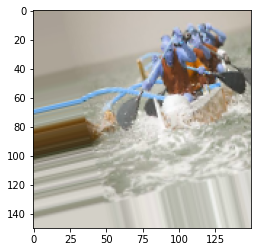

In [9]:
import random
print(len(xTrain))
plt.imshow(xTrain[random.randint(0,7405)])



In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(3, 3))
model.add(layers.MaxPooling2D(3, 3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

# model = models.Sequential()
# model.add(layers.Conv2D(IMG_SIZE, (5, 5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
# model.add(layers.MaxPooling2D(2, 2))
# model.add(layers.Conv2D(256, (5, 5), activation='relu'))
# model.add(layers.MaxPooling2D(2, 2))
# model.add(layers.Conv2D(256, (5, 5), activation='relu'))
# model.add(layers.MaxPooling2D(2, 2))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(2, 2))
# model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(3, 3))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

In [11]:

model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])


In [12]:
history = model.fit(xTrain, yTrain, epochs=50,
                    validation_data=(xTest, yTest))

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


232/232 [==============================] - 16s 38ms/step - loss: 1.3604 - accuracy: 0.4791 - val_loss: 1.0845 - val_accuracy: 0.5750
Epoch 2/50
232/232 [==============================] - 8s 36ms/step - loss: 1.0530 - accuracy: 0.6153 - val_loss: 0.9282 - val_accuracy: 0.6600
Epoch 3/50
232/232 [==============================] - 8s 35ms/step - loss: 0.9100 - accuracy: 0.6754 - val_loss: 0.8287 - val_accuracy: 0.6850
Epoch 4/50
232/232 [==============================] - 8s 35ms/step - loss: 0.8218 - accuracy: 0.7028 - val_loss: 0.7930 - val_accuracy: 0.7100
Epoch 5/50
232/232 [==============================] - 8s 35ms/step - loss: 0.7005 - accuracy: 0.7494 - val_loss: 0.7614 - val_accuracy: 0.7100
Epoch 6/50
232/232 [==============================] - 8s 35ms/step - loss: 0.6329 - accuracy: 0.7762 - val_loss: 0.6475 - val_accuracy: 0.7250
Epoch 7/50
232/232 [==============================] - 8s 35ms/step - loss: 0.5575 - accuracy: 0.8015 - val_loss: 0.6869 - val_accuracy: 0.7500
Epoch 8/5

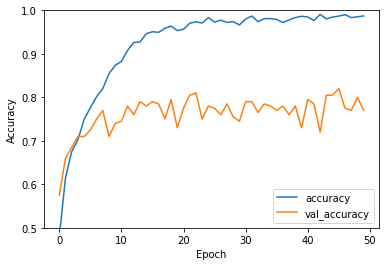

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [14]:


testDir="/content/drive/MyDrive/NN Dataset.zip (Unzipped Files)/Test"
testData=[]
for im in tqdm(os.listdir(testDir)):
    path=os.path.join(testDir,im)
    img=cv2.imread(path)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img=img/255
    testData.append([np.array(img),im])
test=np.array([i[0] for i in testData])

100%|██████████| 688/688 [00:09<00:00, 69.36it/s] 


In [15]:
testOut=model.predict(test)

22/22 [==============================] - 1s 25ms/step


In [16]:
del test

In [17]:
outPutPredicted=[]
for i in range(len(testOut)):
  label=np.argmax(testOut[i])
  outPutPredicted.append([testData[i][1],label])
del testOut
del testData


In [18]:
# outPutPredicted[random.]

In [19]:
Datapd=pd.DataFrame(outPutPredicted)
Datapd.columns=['Image_Name','Label']
Datapd.to_csv('predictions.csv',index=False)

In [20]:
real=pd.read_csv("predictions-1.csv")
pred=pd.read_csv("predictions.csv")
real=real.to_numpy()
pred=pred.to_numpy()
lb=real[0][1].split('[')[1]
lb=lb.split(']')[0]

print(len(real))
print(len(pred))
realNames=[]
realLabels=[]
predNames=[]
predLabels=[]
trues=0
falses=0
for i in range(len(real)):
  name=real[i][0].split('/')[-1]
  for j in range(len(pred)):
    pname=pred[j][0]
    if(name==pname):
      lb=real[i][1].split('[')[1] 
      lb=int(lb.split(']')[0])
      plb=pred[j][1]
      if(lb==plb):
        trues+=1
      elif(lb!=plb):
        falses+=1
      # print(name,pname)
      # print(lb,plb)
      realNames.append(name)
      realLabels.append(lb)
      predNames.append(pname)
      predLabels.append(plb)
      break

print("true",trues,"false",falses)

del predNames
del real
del pred

653
688
true 518 false 128


In [24]:
model.save('m.h5')

In [23]:
k=0
for i in range(len(realNames)):
  if(realLabels[i]!=predLabels[i]):
    k+=1

print("acc =", 100-(((k+33)/(len(realNames)+33)*100)))
print("acc =", ((trues/len(realNames))*100))


acc = 76.28865979381443
acc = 80.18575851393189
